Sample Dataset

In [1]:
import pandas as pd

pizza = {'diameter' : [6, 8, 10, 14, 18],   # diameter sebagai future 
         'harga' : [7, 9, 13, 17.5, 18]}    # harga sebagai target

pizza_df = pd.DataFrame(pizza)
pizza_df

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


Visualisasi Data

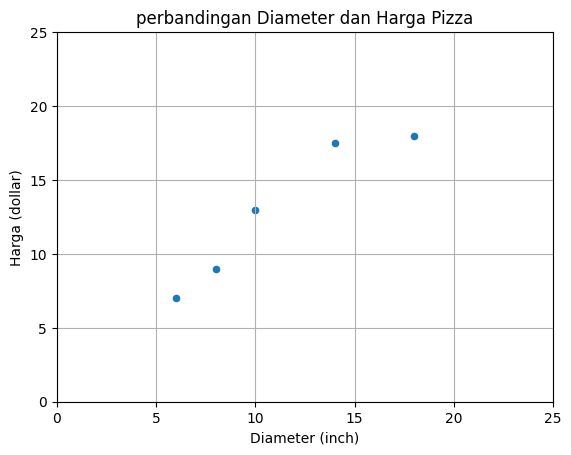

In [16]:
import matplotlib.pyplot as plt

# x sebagai Diameter
# y sebagai Harga

pizza_df.plot(kind='scatter', x='diameter', y='harga')

plt.title('perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

Penyesuaian Dataset

In [17]:
import numpy as np

X = np.array(pizza_df['diameter'])
y = np.array(pizza_df['harga'])

print(f'x : {X}')
print(f'y : {y}')

x : [ 6  8 10 14 18]
y : [ 7.   9.  13.  17.5 18. ]


In [18]:
X = X.reshape(-1, 1)
X.shape

(5, 1)

In [19]:
X

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]], dtype=int64)

Training Simple Linear Regression Model

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

Visualisasi Simple Linear Regression Model

In [21]:
x_vis = np.array([0, 25]).reshape(-1, 1)
y_vis = model.predict(x_vis) 

In [22]:
print(y_vis)

[ 1.96551724 26.37284483]


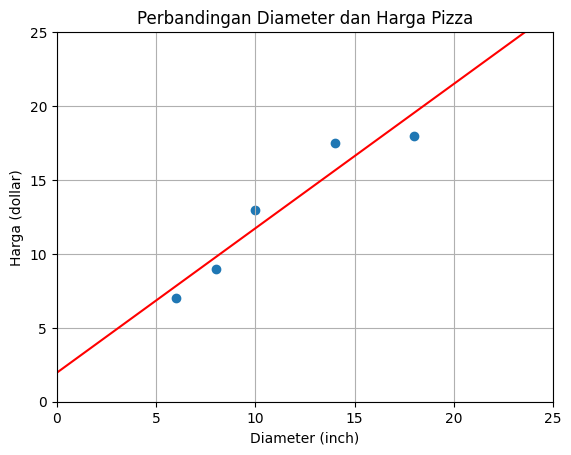

In [23]:
plt.scatter(X, y)
plt.plot(x_vis, y_vis, '-r')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

Formula Linear Regression : y = a + Bx                                                                                                                     y = response variable (target)                                                                                                                              x = explanatory variable (futures)                                                                                                                          a (alpha) = intercept (nilai pada sumbu y ketika sumbu x bernilai 0)                                                                                       B (beta) = slope 

In [24]:
print(f'intercept : {model.intercept_}')
print(f'slope : {model.coef_}')

intercept : 1.965517241379315
slope : [0.9762931]


Mencari Nilai Slope                                                                                                                                    nilai slope pada Linear Regression bisa diperoleh dengan memanfaatkan formula berikut:                                                                     B (beta) = cov(x,y)/var(x) 

In [25]:
print(f'X:\n{X}\n')
print(f'X flatten : {X.flatten()}\n')
print(f'y: {y} ')

X:
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

X flatten : [ 6  8 10 14 18]

y: [ 7.   9.  13.  17.5 18. ] 


Variance

In [26]:
variance_x = np.var(X.flatten(), ddof=1)

print(f"variance : {variance_x}")

variance : 23.2


Covariance

In [27]:
np.cov(X.flatten(), y)

array([[23.2 , 22.65],
       [22.65, 24.3 ]])

In [28]:
#nilai covariance yang digunakan adalah pada matriks diagonal /(pd baris 1 kolom 2 dan baris 2 kolom 1), yaitu 22,65
covariance_xy = np.cov(X.flatten(), y)[0][1]
print(f"covariance : {covariance_xy}") 

covariance : 22.650000000000002


Slope

In [29]:
slope = covariance_xy / variance_x
print(f"slope : {slope}")

slope : 0.976293103448276


Mencari Nilai Intercept
nilai intercept pada Linear regression bisa diperoleh dengan memanfaakan formula berikut:
a(alpha)=y(rata-rata y)-b(beta)x(rata-rata x)

In [30]:
intercept = np.mean(y) - slope * np.mean(X)

print(f"intercept : {intercept}")

intercept : 1.9655172413793096


MEMPREDIKSI HARGA PIZZA

In [31]:
input_diameter_pizza = np.array([12, 20, 23]).reshape(-1, 1)
input_diameter_pizza

array([[12],
       [20],
       [23]])

In [32]:
prediksi_harga = model.predict(input_diameter_pizza)
prediksi_harga

array([13.68103448, 21.49137931, 24.42025862])

In [34]:
for diameter, harga in zip(input_diameter_pizza, prediksi_harga):
    print(f"Diameter : {diameter}, Prediksi harga : {harga}")

Diameter : [12], Prediksi harga : 13.681034482758621
Diameter : [20], Prediksi harga : 21.491379310344826
Diameter : [23], Prediksi harga : 24.42025862068965


Evaluasi Simpe Linear Regression Model

In [35]:
# Training & Testing Dataset
X_train = np.array([6, 8, 10, 14, 18]).reshape(-1, 1)
y_train = np.array([7, 9, 13, 17.5, 18])

X_test = np.array([8, 9, 11, 16, 12]).reshape(-1, 1)
y_test = np.array([11, 8.5, 15, 18, 11])

In [36]:
# Training Simple Linear Regression Model
model_test = LinearRegression()
model_test.fit(X_train, y_train)

LinearRegression()

Evaluasi Linear Regression Model dengan Coefficient of Determination atau R-squared(R^2)

In [38]:
from sklearn.metrics import r2_score

y_prediction = model_test.predict(X_test)

r_squared = r2_score(y_test, y_prediction)

print(f"R-squared : {r_squared}")
print("nilai R-squared semakin mendekati 1 maka lebih baik")
print("semakin menjauh dari 1 atau bahkan bernilai negatif maka semakin buruk")

R-squared : 0.6620052929422553
nilai R-squared semakin mendekati 1 maka lebih baik
semakin menjauh dari 1 atau bahkan bernilai negatif maka semakin buruk


Mencari Nilai R-squared(R^2)

R^2 = 1 - SSres/SStot

In [39]:
# SSres 
ss_res = sum([(y_i - model_test.predict(x_i.reshape(-1, 1))[0])**2
              for x_i, y_i in zip(X_test, y_test)])

print(f"SSres : {ss_res}")

SSres : 19.1980993608799


In [40]:
# SStot
mean_y = np.mean(y_test)
ss_tot = sum([(y_i - mean_y)**2
              for y_i in y_test])

print(f"SStot : {ss_tot}")

SStot : 56.8


In [41]:
# R^2
r_square = 1 - (ss_res/ss_tot)

print(f"R-squared : {r_square}")

R-squared : 0.6620052929422553
